In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Show first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df['gender_numeric'] = df['gender'].map({'female': 0, 'male': 1})


In [12]:
race_map = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D': 3,
    'group E': 4
}
df['race_encoded'] = df['race/ethnicity'].map(race_map)



In [14]:
education_map = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parent_edu_encoded'] = df['parental level of education'].map(education_map)


In [16]:
df['lunch_encoded'] = df['lunch'].map({'free/reduced': 0, 'standard': 1})


In [18]:
df['test_prep_encoded'] = df['test preparation course'].map({'none': 0, 'completed': 1})


In [20]:
df_cleaned = df.drop(columns=[
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
])


In [22]:
df_cleaned.head()


,math score,reading score,writing score,gender_numeric,race_encoded,parent_edu_encoded,lunch_encoded,test_prep_encoded
0,72,72,74,0,1,4,1,0
1,69,90,88,0,2,2,1,1
2,90,95,93,0,1,5,1,0
3,47,57,44,1,0,3,0,0
4,76,78,75,1,2,2,1,0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")


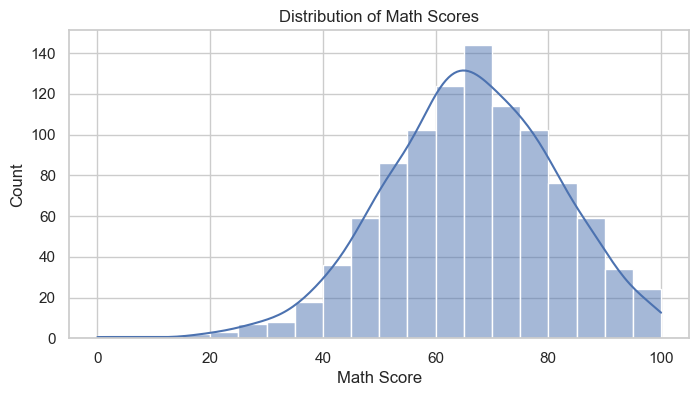

In [26]:
# Histogram of math scores
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['math score'], kde=True, bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.show()


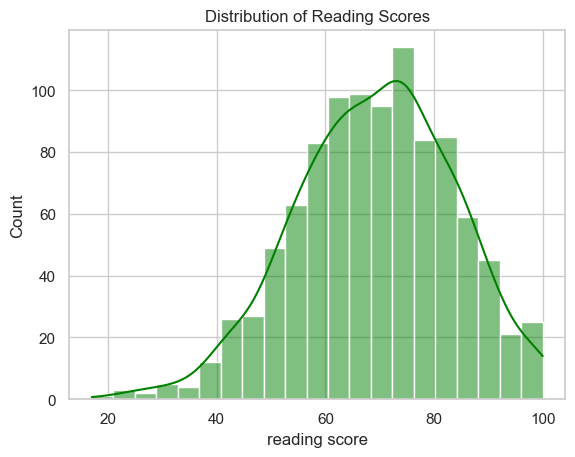

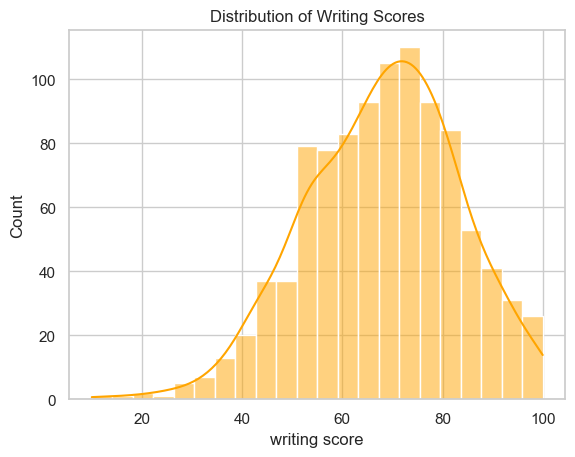

In [28]:
sns.histplot(df_cleaned['reading score'], kde=True, color='green')
plt.title("Distribution of Reading Scores")
plt.show()

sns.histplot(df_cleaned['writing score'], kde=True, color='orange')
plt.title("Distribution of Writing Scores")
plt.show()


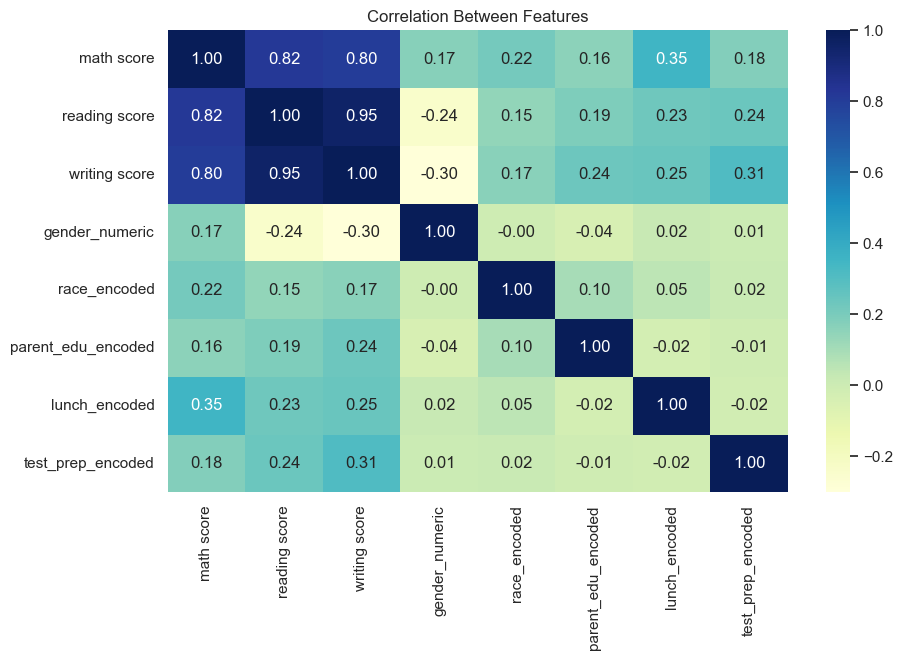

In [30]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()


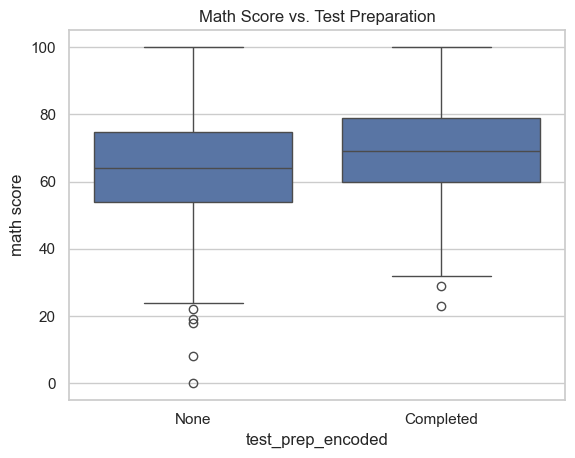

In [32]:
# Boxplot to compare math scores based on test prep
sns.boxplot(x='test_prep_encoded', y='math score', data=df_cleaned)
plt.xticks([0, 1], ['None', 'Completed'])
plt.title("Math Score vs. Test Preparation")
plt.show()


In [34]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)

sns.set(style="whitegrid")

# 📌 Step 2: Load Dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# 📌 Step 3: Data Cleaning and Encoding

# Gender: female=0, male=1
df['gender_numeric'] = df['gender'].map({'female': 0, 'male': 1})

# Race/Ethnicity: label encoding
df['race_encoded'] = df['race/ethnicity'].map({
    'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4
})

# Parental education: ordered encoding
df['parent_edu_encoded'] = df['parental level of education'].map({
    "some high school": 0, "high school": 1, "some college": 2,
    "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5
})

# Lunch: binary encoding
df['lunch_encoded'] = df['lunch'].map({'free/reduced': 0, 'standard': 1})

# Test preparation course: binary encoding
df['test_prep_encoded'] = df['test preparation course'].map({'none': 0, 'completed': 1})

# Create cleaned dataset
df_cleaned = df.drop(columns=[
    'gender', 'race/ethnicity', 'parental level of education',
    'lunch', 'test preparation course'
])
df_cleaned.head()


,math score,reading score,writing score,gender_numeric,race_encoded,parent_edu_encoded,lunch_encoded,test_prep_encoded
0,72,72,74,0,1,4,1,0
1,69,90,88,0,2,2,1,1
2,90,95,93,0,1,5,1,0
3,47,57,44,1,0,3,0,0
4,76,78,75,1,2,2,1,0


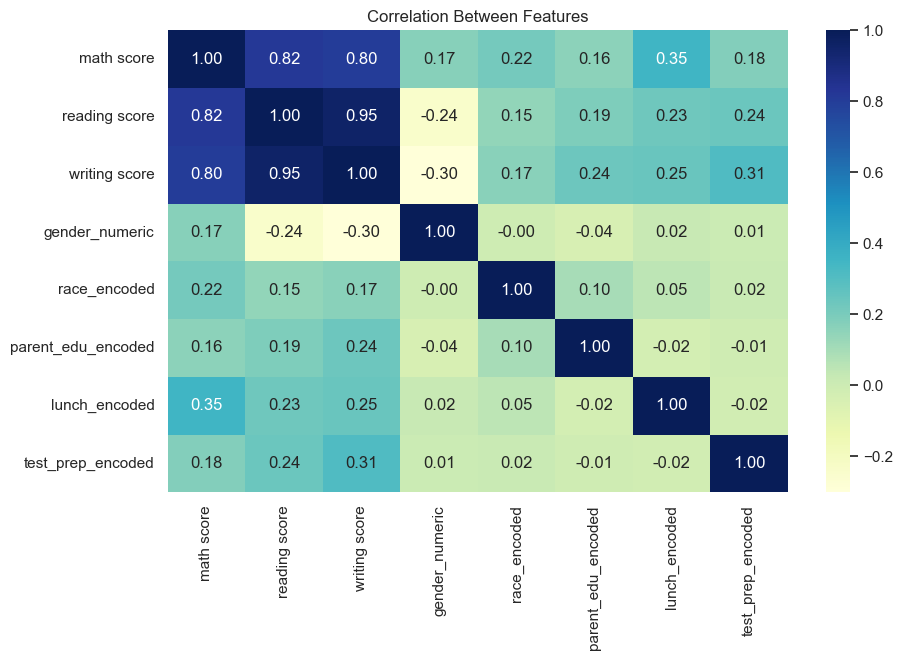

In [38]:
# 📊 Step 4: EDA – Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()


In [40]:
# 📈 Step 5: Regression – Predicting Math Score

X = df_cleaned.drop(columns=['math score'])
y = df_cleaned['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluate regression
print("📊 Regression Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


📊 Regression Model Performance:
MAE: 4.126475424095519
RMSE: 5.2815523450623445
R²: 0.885366242345501


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
# 🔍 Step 6: Classification – Predicting if Math Score > 70

df_cleaned['math_score_high'] = (df_cleaned['math score'] > 70).astype(int)

X_cls = df_cleaned.drop(columns=['math score', 'math_score_high'])
y_cls = df_cleaned['math_score_high']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Evaluate classification
print("\n📋 Classification Model Performance:")
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Confusion Matrix:\n", confusion_matrix(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))



📋 Classification Model Performance:
Accuracy: 0.815
Confusion Matrix:
 [[108  17]
 [ 20  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       125
           1       0.76      0.73      0.75        75

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200

